In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import BoxStyle
from matplotlib.patches import FancyBboxPatch

import numpy as np

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [2]:
data_path = "/Users/oliverpaul/Data_Science/idiap/lucideles/data"

### Loading results data

Change dpi when exporting for better quality 

In [3]:
#load the results
train_results = np.load(data_path + '/train_results.npy',allow_pickle='TRUE').item()
valid_results = np.load(data_path + '/valid_results.npy',allow_pickle='TRUE').item()
test_results = np.load(data_path + '/test_results.npy',allow_pickle='TRUE').item()

#getting indices of indexes
INDICES = {name: i for i, name in enumerate(train_results['index'])}

#some messy operations...

#changing name of keys so that we can directly use keys as labels
train_results['Random Forest'] = train_results.pop('RF')
valid_results['Random Forest'] = valid_results.pop('RF')
test_results['Random Forest'] = test_results.pop('RF')

#Removing index and changing the order of some of the keys now to make plotting easier...
order = ['linear', 'MLP', 'Random Forest', 'XGboost']
TRAIN_RESULTS = {k : train_results[k] for k in order}
VALID_RESULTS = {k : valid_results[k] for k in order}
TEST_RESULTS = {k : test_results[k] for k in order}

In [4]:
#custom colors
colours = ['#666666', '#4385f3'] # dimgray, royal blue

In [5]:
def plot_eval_metrics(plot_metric, y_axis, title, valid=VALID_RESULTS, 
                      test=TEST_RESULTS, indices=INDICES, plt_grid = False,
                     dpi=None):
    
    valid_ = valid.copy()
    test_ = test.copy()
    
    #removing linear regression - the scales are too different...
    del valid_['linear']
    del test_['linear']
    
    val_metric = [v[indices[plot_metric]] for v in valid_.values()]
    test_metric = [v[indices[plot_metric]] for v in test_.values()]
    
    x = np.arange(len(val_metric))
    width = 0.4
    labels = valid_.keys()
    
    fig, ax = plt.subplots(figsize=(12,8), dpi=dpi)

    plt.grid(False)
    if plt_grid:
        plt.grid(color='k', ls = '-.', lw = 0.2, axis='y')
    plt.bar(x - 0.21, val_metric, width, label = 'Validation set', edgecolor='k', color=colours[0], zorder=100, alpha=0.9)
    plt.bar(x + 0.21, test_metric, width, label = 'Test set', edgecolor='k', color=colours[1], zorder=100, alpha=0.9)
    plt.ylabel(y_axis, color='k')
    plt.title(title)
    plt.xticks(ticks=x, labels=labels, rotation=0)
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    ax.tick_params(colors='k')
    _ = plt.legend(facecolor='white')

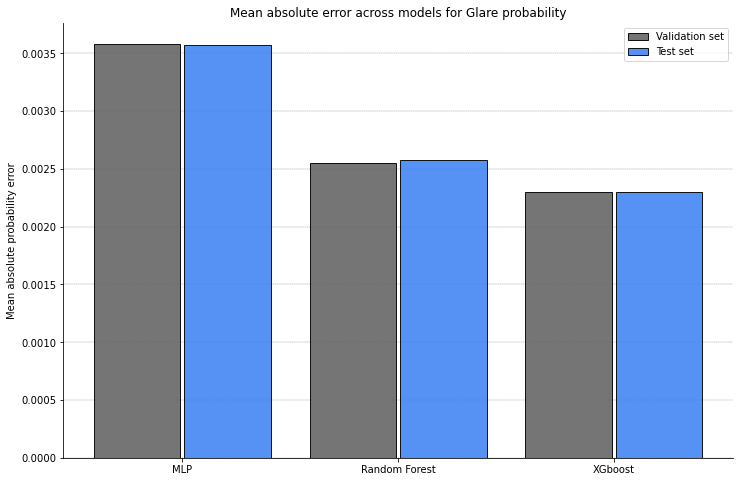

In [18]:
plot_metric = 'mae_dgp'
y_axis = 'Mean absolute probability error'
title = 'Mean absolute error across models for Glare probability'

plot_eval_metrics(plot_metric, y_axis, title, 
                  valid=VALID_RESULTS, test=TEST_RESULTS, 
                  indices=INDICES, plt_grid=True, dpi=None)

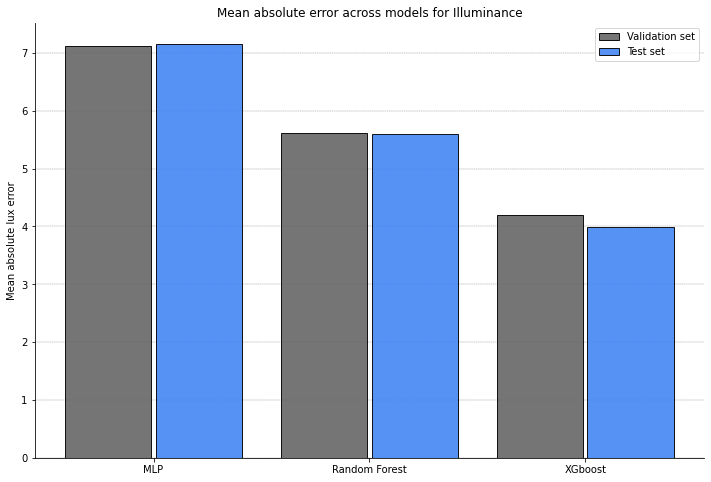

In [19]:
plot_metric = 'mae_ill'
y_axis = 'Mean absolute lux error'
title = 'Mean absolute error across models for Illuminance'

plot_eval_metrics(plot_metric, y_axis, title, 
                  valid=VALID_RESULTS, test=TEST_RESULTS, 
                  indices=INDICES, plt_grid=True, dpi=None)

In [9]:
def plot_accuracy(plot_metric, y_axis, title, train=TRAIN_RESULTS, 
                  valid=VALID_RESULTS, test=TEST_RESULTS, indices=INDICES,
                  plt_grid = False, dpi=None):
    
    valid_ = valid.copy()
    test_ = test.copy()
    
    val_metric = [v[indices[plot_metric]]*100 for v in valid_.values()]
    test_metric = [v[indices[plot_metric]]*100 for v in test_.values()]
    
    x = np.arange(len(val_metric))
    width = 0.4
    labels = valid_.keys()
    
    fig, ax = plt.subplots(figsize=(12,8), dpi=dpi)

    plt.grid(False)
    if plt_grid:
        plt.grid(color='k', ls = '-.', lw = 0.2, axis='y')
    plt.bar(x - 0.21, val_metric, width, label = 'Validation set', edgecolor='k', color=colours[0], zorder=100, alpha=0.9)
    plt.bar(x + 0.21, test_metric, width, label = 'Test set', edgecolor='k', color=colours[1], zorder=100, alpha=0.9)
    plt.ylabel(y_axis, color='k')
    plt.title(title, pad=20)
    plt.xticks(ticks=x, labels=labels, rotation=0)
    for i in ax.patches:
        ax.text(i.get_x()+.05, i.get_height()+2, \
                str(round((i.get_height()), 3)) + '%', fontsize=11, color='k',
                    rotation=0)
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    ax.tick_params(colors='k')
    _ = plt.legend(facecolor='white')

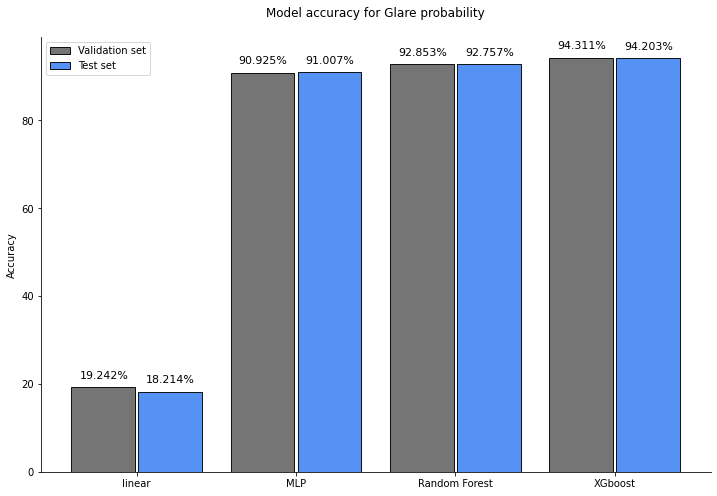

In [20]:
plot_metric= 'acc_dgp'
y_axis='Accuracy'
title= 'Model accuracy for Glare probability'

plot_accuracy(plot_metric, y_axis, title, plt_grid = False, dpi=None)

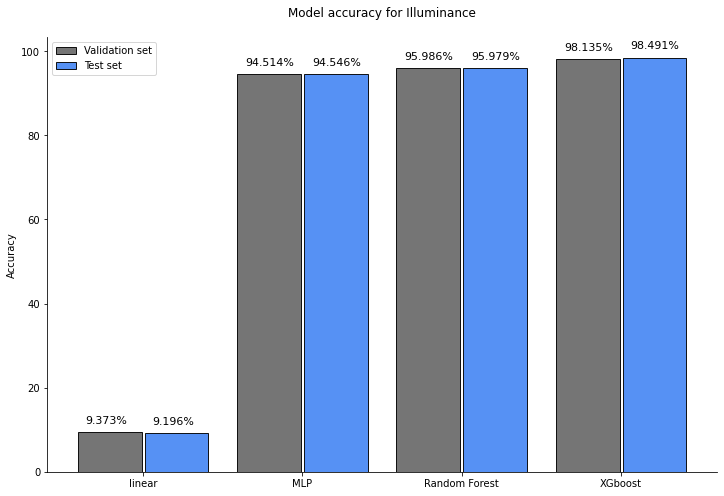

In [21]:
plot_metric= 'acc_ill'
y_axis='Accuracy'
title= 'Model accuracy for Illuminance'

plot_accuracy(plot_metric, y_axis, title, plt_grid = False, dpi=None)